# Métodos de Validação 

# Como avaliar a performace dos modelos

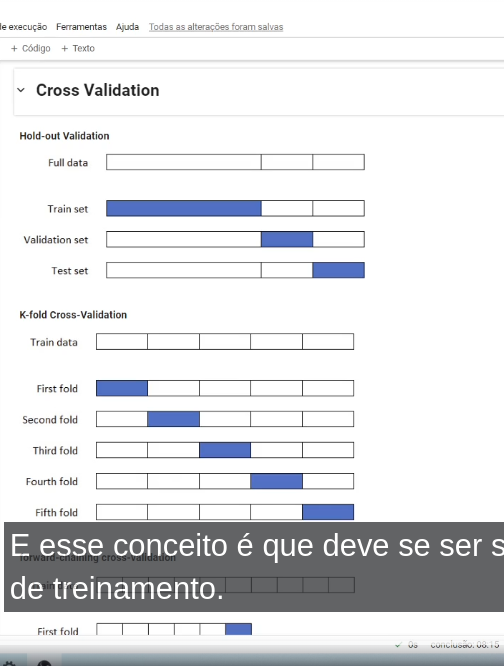



O conceito é que deve ser separado os dados de teste e de treinamento. 

Nunca se deve treinar o modelo e testa-lo com os mesmos dados. 


Então a validação cruzada ou cross-validation será a técnica que nos ajudará a aplicar esse conceito. 

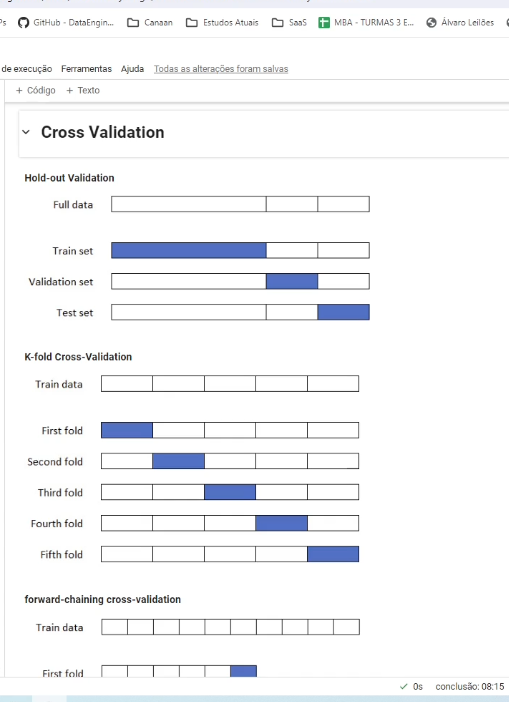


##### Talvez estejam familiarizados com as técnicas do K-fold Cross-validation

#### Mas, resumidamente, veremos que ela não se aplica a séries temporais, pois o k-fold necessita que as observações sejam independentes. Isso ao contrário do que nós vemos em séries temporais, pois nós precisamos que os dados estejam em uma ordem correta. 




Temos que entender como o Cross-Validation funciona, para entender como o Prophet funciona. 

# Primeiro vamos dar uma olhada como funciona a técnica mais básica de validação de dados, que seria a Hold Out validation

Nós segmentamos todos os nossos dados em treino, validação e teste, geralmente numa proporção de :

- 60% para treino
  
- 20% para validação

- 20% para teste

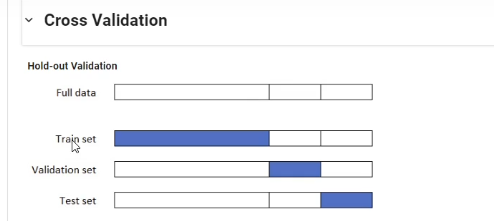

Entretanto, essa abordagem tem suas desvantagens, pois apenas 60% dos dados são usados para ensinar o modelo. O que pode introduzir um viés, pois nós deixamos uma grande parte da nossa amostragem de fora. 



# Diante desse cenário, o K-fold Cross-Validation vem para melhorar esse processo de validação, pois o K-fold funciona:

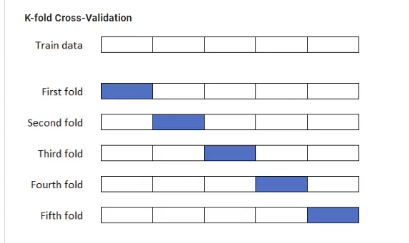

Nós treinamos e validamos o modelo como 100% dos dados, mas em momentos diferentes. 


Vamos supor que nós vamos treinar o nosso modelo aqui com cinco folds, ou seja cinco segmentações. 

Como funcionaria nesse caso: 

- nós pegaríamos 1 fold que seria equivalente a 20% dos dados e deixaremos reservados para teste e treinamos o nosso modelo com os 80% restantes dos dados.

- segunda iteração => nós pegamos o segundo bloco e separamos para teste e pegamos os 80% restantes dos dados e treinamos o modelo com ele e fazemos assim sucessivamente. 



Com isso, em iterações diferentes, o nosso modelo teve contato com 100% dos dados. 

E com isso nós avaliamos o nosso modelo com a média de acerto dele referente às cinco execuções. Mas, também podemos inspecionar se em alguma execução houve uma queda de performance, porque nós podemos enteder que ali localmente, no fold, que estava sendo utilizado para teste de alguma forma era importante para o dado. 

Embora esse método leve mais tempo, a grande vantagem é o uso de mais dados para o treinamento sem viés. 

##E quanto aos dados temporais que são sequenciais e dependentes? 

# Em séries temporais não podemos simplesmente embaralhar os dados, o que nos leva ao <font color="red">forward-chaining cross-validation</font>

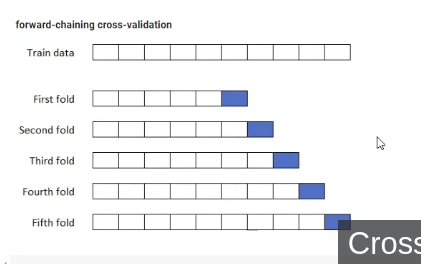


Nesse método, nós mantemos a ordem dos dados enquanto reservamos porções para teste e validação. 

É uma solução inteligente para dados sequenciais. 


#### Então escolher qual técnica usar depende do conjunto de dados e do problema que você está enfrentando. Tanto pelo hold-out validation, quanto pelo k-fold cross-validation, e o forward-chaining cross-validation são ferramentas poderosas, para lidar com diferentes cenários. 

# Agora imergindo um pouco no forward-chaining cross-validation, também conhecido como Rolling Origin Cross-Validation. 

Rolling Origin Cross-Validation. é semelhante ao k-fold, mas especialmente adaptada para todos os dados sequenciais, como as séries temporais. 


A diferença crucial é que não há embaralhamento aleatório dos dados no início. Mas, ainda assim reservamos um conjunto de teste.

O conjunto de teste deve ser a porção final dos dados. Por exemplo, se cada fold representar 10% dos dados, aqui que nós dividimos nossos dados em 10 segmentos, o conjunto de teste será sempre os últimos 10% do nosso intervalo selecionado. 

Um parâmeto importante de definir sempre quando vamos treinar uma série temporal é definir a quantidade inicial para treinar. 

Digamos que para esse exemplo nós vamos pegar 5 fontes iniciais como treinamento e vamos testá-lo no sexto 6a fold. 

Ou seja, os últimos 5 folds serão utilizados como teste em iterações diferentes. 


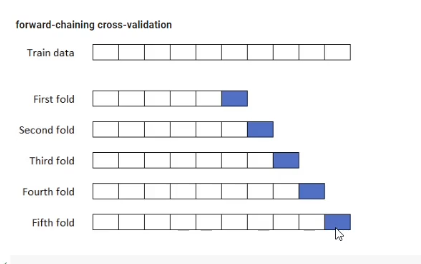

- primeira iteração, nós treinamos como os 5/1 folds e testamos com o sexto. 

- na segunda iteração, nós treinamos com os 6/1 folds e testamos com o sétimo. 

- e fazemos assim sucessivamente. 


# E o nosso score final do modelo vai ser a média de todas essas iterações. 


# E para facilitar a nossa vida, o Prophet tem uma ferramente de diagnóstico incorporada para realizar o Forward-chaining cross-validation
